# Bajando datos de diferentes fuentes. Ejemplos

## Bajar datos de Bicimad

In [1]:
# Importamos librerias
import requests
import zipfile
import pandas as pd

In [7]:
import os

In [8]:
os.getcwd()

'c:\\Users\\josel\\Documents\\THISONE\\A SUBIR\\ds_ft_sep_22\\2-Data_Analysis\\3-Sources\\Web\\Teoría'

{'Connection': 'keep-alive', 'Content-Length': '32796', 'perf': '7626143928', 'cache-control': 'max-age=604800, must-revalidate', 'last-modified': 'Thu, 02 Jul 2015 19:24:53 GMT', 'x-transaction-id': 'cf38d4456821a06a', 'timing-allow-origin': 'https://twitter.com, https://mobile.twitter.com', 'strict-transport-security': 'max-age=631138519', 'access-control-allow-origin': '*', 'access-control-expose-headers': 'Content-Length', 'X-Content-Type-Options': 'nosniff', 'Content-Type': 'image/jpeg', 'Accept-Ranges': 'bytes', 'Date': 'Wed, 19 Oct 2022 07:29:05 GMT', 'X-Cache': 'HIT, HIT', 'x-tw-cdn': 'FT', 'x-served-by': 'cache-lhr7333-LHR, cache-dub4346-DUB, cache-tw-ZZZ1', 'Server-Timing': 'x-cache;desc=HIT, x-tw-cdn;desc=FT'}

In [2]:
url = "https://pbs.twimg.com/profile_images/616689518968762368/rkhjKqNb.jpg"
image = requests.get(url)

In [6]:
with open("mutenrroy.jpg", 'wb') as f:
    f.write(image.content)

In [14]:
# https://opendata.emtmadrid.es/getattachment/037ee8a5-b824-43b1-ac7b-76225c783993/201810_Usage_Bicimad.aspx


url = 'https://opendata.emtmadrid.es/getattachment/037ee8a5-b824-43b1-ac7b-76225c783993/201810_Usage_Bicimad.aspx'

r = requests.get(url)

In [16]:
r.content[0:40]

In [11]:
# Guardamos el zip
filename = 'bicis.zip'
with open(filename, 'wb') as f:
   f.write(r.content)

In [3]:
# Extraemos lo que hay dentro
filename = 'bicis.zip'
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(".")

In [4]:
# Leemos los datos
datos_bicis = pd.read_json('201810_Usage_Bicimad.json', lines=True, encoding='latin-1', nrows=10000)

In [5]:
# Vemos qué pinta tienen
datos_bicis.head()

,_id,user_day_code,idplug_base,track,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code
0,{'$oid': '5bb83a812f3843232804c20e'},1744f53ab2816608dbad911cfd86d21d29e2780d8e5436...,18,"{'type': 'FeatureCollection', 'features': [{'g...",1,2,312,54,4,133,{'$date': '2018-10-01T01:00:00.000+0200'},28005
1,{'$oid': '5bb83a812f3843232804c20f'},29b46c22d367cb8444170edb870805654b4b126659dadb...,1,"{'type': 'FeatureCollection', 'features': [{'g...",1,3,280,1,0,59,{'$date': '2018-10-01T01:00:00.000+0200'},
2,{'$oid': '5bb83a812f3843232804c211'},0d80203ef0ffd087c99475a82d370e977f09f0cbda57f7...,1,NaN,1,5,276,64,0,74,{'$date': '2018-10-01T01:00:00.000+0200'},
3,{'$oid': '5bb83a812f3843232804c212'},b13348d8847744fd858ce3c14b773682f008792b19c0d6...,8,NaN,3,23,20,129,5,129,{'$date': '2018-10-01T01:00:00.000+0200'},
4,{'$oid': '5bb83a812f3843232804c213'},7414495448ddcda88650a9b26203719453467f14c60681...,23,"{'type': 'FeatureCollection', 'features': [{'g...",1,20,365,134,3,127,{'$date': '2018-10-01T01:00:00.000+0200'},28005


In [6]:
datos_bicis['track']

0       {'type': 'FeatureCollection', 'features': [{'g...
1       {'type': 'FeatureCollection', 'features': [{'g...
2                                                     NaN
3                                                     NaN
4       {'type': 'FeatureCollection', 'features': [{'g...
                              ...                        
9995    {'type': 'FeatureCollection', 'features': [{'g...
9996                                                  NaN
9997    {'type': 'FeatureCollection', 'features': [{'g...
9998                                                  NaN
9999    {'type': 'FeatureCollection', 'features': [{'g...
Name: track, Length: 10000, dtype: object

# Acceso a archivos de la pagina de datos.gob.es
Uno de los mayores catálogos de información pública descargable en España

In [3]:
# https://datos.gob.es/es/catalogo/ea0003337-principales-indicadores-de-sostenibilidad1

url = "https://data.renfe.com/dataset/928d911e-00ca-437b-be3f-068fc1f97800/resource/63d285e8-9f52-410b-8412-8a8c26f5ddb3/download/consumo-de-agua-y-materiales.csv"
# url = "https://estadisticas.mecd.gob.es/EducaJaxiPx/files/_px/es/csv_c/Universitaria/Financiacion_gasto/2018/ingresos/l0/Pres_Ingr_PrevDRN_CA.px"
datos = pd.read_csv(url, sep=";")
datos

,Año,Consumo de agua (m3),Aceites/grasas (kg),Pinturas (kg)
0,2019,903240,540511,88537
1,2018,917605,446983,116778
2,2017,923881,452534,96362
3,2016,952455,302202,125304
4,2015,941651,315302,130003
5,2014,1023534,319674,125448
6,2013,905703,308904,96946


In [19]:
df = pd.read_csv('Pres_Ingr_PrevDRN_CAsc.csv', sep = ';', header = 5, encoding = 'latin-1')

In [20]:
df

,Unnamed: 0,Previsión Inicial,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Previsiones presupuestarias definitivas,Unnamed: 9,...,Unnamed: 160,Unnamed: 161,Derechos reconocidos netos.7,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169
0,NaN,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2.012000e+03,2.013000e+03,...,2017.00,2018,2012.00,2013.00,2014.00,2015.00,2016.00,2017.00,2018,NaN
1,Total Universidades Públicas,9.212530e+09,8.739971e+09,8.594584e+09,8.733942e+09,8.939175e+09,8.892017e+09,9.288087e+09,1.213280e+10,1.143918e+10,...,6724092.36,526821.97,19240793.26,769910.63,3580534.94,2850028.84,1931248.72,22937114.07,1688980.69,NaN
2,Andalucía,1.798393e+09,1.636452e+09,1.582915e+09,1.628552e+09,1.676944e+09,1.732860e+09,1.798159e+09,2.527445e+09,2.373018e+09,...,69742.92,46259.31,100167.49,119329.67,413193.14,720379.62,293240.03,193704.96,654810.33,NaN
3,Aragón,2.559657e+08,2.578565e+08,2.516782e+08,2.462158e+08,2.568259e+08,2.671617e+08,2.703907e+08,2.790012e+08,2.702751e+08,...,0.00,0.0,0.00,0.00,0.00,0.00,65000.00,0.00,3086.11,NaN
4,Asturias (Principado de),2.115028e+08,1.979083e+08,1.950512e+08,1.935263e+08,1.959949e+08,2.002651e+08,2.061807e+08,2.212639e+08,1.990316e+08,...,0.00,0.0,0.00,223657.11,1330.00,1050002.00,0.00,0.00,0.0,NaN
5,Balears (Illes),8.822158e+07,8.531465e+07,8.603987e+07,8.643781e+07,8.865956e+07,9.351993e+07,1.025815e+08,1.291032e+08,1.212071e+08,...,0.00,..,2414.83,0.00,0.00,0.00,0.00,0.00,..,NaN
6,Canarias,2.795701e+08,2.630590e+08,2.627177e+08,2.669174e+08,2.686117e+08,2.794140e+08,2.868361e+08,3.320790e+08,3.201881e+08,...,1386.72,36677.51,2995.84,26489.18,423.50,3747.30,3799.24,4643.05,42235.34,NaN
7,Cantabria,1.239057e+08,9.940598e+07,9.890426e+07,9.843526e+07,1.059745e+08,1.075533e+08,1.087064e+08,1.722776e+08,1.379283e+08,...,0.00,..,0.00,0.00,0.00,0.00,0.00,0.00,..,NaN
8,Castilla - La Mancha,1.716503e+08,1.813540e+08,1.876065e+08,2.466648e+08,2.237427e+08,2.199919e+08,2.197650e+08,1.981521e+08,1.965181e+08,...,500000.00,..,52801.53,5371.90,247.93,16717.30,0.00,500000.00,..,NaN
9,Castilla y León,5.273631e+08,5.325229e+08,5.323485e+08,5.327280e+08,5.424026e+08,5.593807e+08,5.644894e+08,5.797359e+08,5.755939e+08,...,20026.69,31651.04,241920.24,44031.42,164434.27,23139.21,174848.10,122409.54,44767.4,NaN


In [10]:
datos.columns

Index(['Año', 'Consumo de agua (m3)', 'Aceites/grasas  (kg)', 'Pinturas (kg)'], dtype='object')

In [4]:
url = 'https://opendata.euskadi.eus/contenidos/estadistica/tablas_essec_2020/es_tblestad/data/2016-2019_Tablas_es-.xlsx'
datos_pvasco = pd.read_excel(url, sheet_name='P3', header=2)
datos_pvasco

,Unnamed: 0,Abs.,Abs..1,Abs..2,Abs..3,% ver,% ver.1,% ver.2,% ver.3,%
0,Centros residenciales,208.0,87.0,91.0,126.0,1.458523,0.593452,0.605496,0.805781,38.461538
1,Servicios de respiro y apoyo,122.0,92.0,92.0,122.0,0.855480,0.627558,0.612150,0.780201,32.608696
2,Centros de día asistenciales,4414.0,4464.0,4452.0,4529.0,30.951546,30.450205,29.622729,28.963356,1.729560
3,Comedores,558.0,658.0,763.0,896.0,3.912769,4.488404,5.076851,5.729999,17.431193
4,Otros centros no residenciales,138.0,155.0,179.0,174.0,0.967674,1.057299,1.191031,1.112745,-2.793296
5,TOTAL PERSONAS MAYORES,5440.0,5456.0,5577.0,5847.0,38.145993,37.216917,37.108257,37.392083,4.841313
6,Centros residenciales,19.0,14.0,8.0,9.0,0.133230,0.095498,0.053230,0.057556,12.500000
7,Servicio de respiro y apoyo,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN
8,Centros de día,2150.0,2106.0,2188.0,2212.0,15.076082,14.365621,14.558520,14.145936,1.096892
9,Centros de recuperación y atención,821.0,765.0,778.0,805.0,5.756960,5.218281,5.176658,5.148046,3.470437


In [5]:
lista_hojas = ['P1','P2','P3']

for hoja in lista_hojas:
    datos_pvasco = pd.read_excel(url, sheet_name=hoja, header=2)
    datos_pvasco.to_csv('Pais_vasco_hoja_' + str(hoja) + '.csv')

<AxesSubplot:xlabel='Año', ylabel='Aceites/grasas  (kg)'>

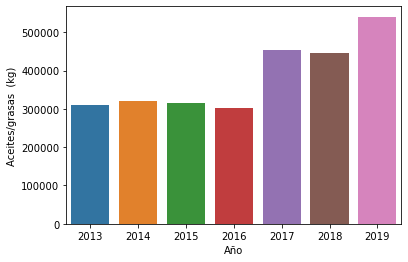

In [6]:
import seaborn as sns
sns.barplot(data = datos, x = 'Año', y = 'Aceites/grasas  (kg)')

## Bajando datos de la calidad del aire

También existe un dataset en Kaggle, pero vamos a ver un ejemplo

In [35]:
import pandas as pd
import requests
import io
import csv

url2 = "http://www.mambiente.munimadrid.es/opendata/horario.txt"

datos=pd.read_csv(url2, header=None)#.content


In [36]:
datos

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,28,79,8,1,38,2,2021,10,6,1.0,...,0,N,0,N,0,N,0,N,0,N
1,28,79,8,6,48,2,2021,10,6,0.2,...,0,N,0,N,0,N,0,N,0,N
2,28,79,8,7,8,2,2021,10,6,3.0,...,0,N,0,N,0,N,0,N,0,N
3,28,79,8,8,8,2,2021,10,6,21.0,...,0,N,0,N,0,N,0,N,0,N
4,28,79,8,9,47,2,2021,10,6,4.0,...,0,N,0,N,0,N,0,N,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,28,79,60,7,8,2,2021,10,6,1.0,...,0,N,0,N,0,N,0,N,0,N
125,28,79,60,8,8,2,2021,10,6,13.0,...,0,N,0,N,0,N,0,N,0,N
126,28,79,60,10,47,2,2021,10,6,5.0,...,0,N,0,N,0,N,0,N,0,N
127,28,79,60,12,8,2,2021,10,6,15.0,...,0,N,0,N,0,N,0,N,0,N


# OpenStreetMap

In [7]:
# Amenities
# https://wiki.openstreetmap.org/wiki/Key:amenity

import requests
import json
import pandas as pd
overpass_url = "http://overpass-api.de/api/interpreter"

overpass_query = """
[out:json];
node["amenity"="cafe"]
  (40.420801, -3.694702,40.423754, -3.688167); 
out;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
print(response)
data = response.json()

<Response [200]>


In [11]:
data

{'version': 0.6,
 'generator': 'Overpass API 0.7.59 e21c39fe',
 'osm3s': {'timestamp_osm_base': '2022-10-19T07:44:54Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 2977298934,
   'lat': 40.4210523,
   'lon': -3.689841,
   'tags': {'addr:city': 'Madrid',
    'addr:housenumber': '4',
    'addr:street': 'Calle de Villalar',
    'amenity': 'cafe',
    'cuisine': 'regional',
    'internet_access': 'yes',
    'name': 'Café Villalar',
    'payment:bitcoin': 'yes',
    'website': 'http://www.cafevillalar.com/'}},
  {'type': 'node',
   'id': 3426617375,
   'lat': 40.4221948,
   'lon': -3.6923421,
   'tags': {'amenity': 'cafe',
    'name': 'Gran Café Gijón',
    'phone': '+34 915 215 425',
    'website': 'https://cafegijon.com/',
    'wikidata': 'Q1025608',
    'wikipedia': 'es:Café Gijón'}},
  {'type': 'node',
   'id': 4703448419,
   'lat': 40.4229908,
   'lon': -3.6936524,
  

In [49]:
data.get('osm3s')

{'timestamp_osm_base': '2021-10-22T10:45:31Z',
 'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'}

In [20]:
data['osm3s']

{'timestamp_osm_base': '2021-10-22T10:45:31Z',
 'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'}

In [21]:
data['osm3s']['copyright']

'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'

In [52]:
data['elements'][0].get('tags').get('addr:street', 34)

34

In [54]:
for element in data['elements']:
    print(element)

{'type': 'node', 'id': 2977298934, 'lat': 40.4210523, 'lon': -3.689841, 'tags': {'addr:city': 'Madrid', 'addr:housenumber': '4', 'addr:street': 'Calle de Villalar', 'amenity': 'cafe', 'cuisine': 'regional', 'internet_access': 'yes', 'name': 'Café Villalar', 'payment:bitcoin': 'yes', 'website': 'http://www.cafevillalar.com/'}}
{'type': 'node', 'id': 3426617375, 'lat': 40.4221948, 'lon': -3.6923421, 'tags': {'amenity': 'cafe', 'name': 'Gran Café Gijón', 'phone': '+34 915 215 425', 'website': 'https://cafegijon.com/', 'wikidata': 'Q1025608', 'wikipedia': 'es:Café Gijón'}}


In [12]:
def json_to_dataframe(data_entrada):
    elements = data_entrada['elements']
    places = {'lat': [], 'lon': [], 'name': [], 'address': []}

    for i in elements:
        lalitude = i['lat']
        longitude = i['lon']
        name = i['tags'].get('name')
        street = i['tags'].get('addr:street', 'Calle x')
        number = i['tags'].get('addr:housenumber', 999)
        
        places['lat'].append(lalitude)
        places['lon'].append(longitude)
        places['name'].append(name)
        places['address'].append(str(street) + ' ' + str(number))

    df = pd.DataFrame(places)
    return df

In [58]:
lista_responses = [data1, data2, data3, data4]
for data in lista_responses:
    df_return = json_to_dataframe(data)
    df_results = df_results.concat(df_return)

,lat,lon,name,address
0,40.421052,-3.689841,Café Villalar,Calle de Villalar 4
1,40.422195,-3.692342,Gran Café Gijón,Calle x 999


In [56]:
places

{'lat': [40.4210523, 40.4221948],
 'lon': [-3.689841, -3.6923421],
 'name': ['Café Villalar', 'Gran Café Gijón'],
 'address': ['Calle de Villalar 4', 'Calle x 999']}

## Web scrapping de IMDB

In [18]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

# Download IMDB's Top 250 data
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]
votes = [b.attrs.get('data-value') for b in soup.select('td.ratingColumn strong')]

imdb = []

# Store each item into dictionary (data), then put those into a list (imdb)
for index in range(0, len(movies)):
    # Seperate movie into: 'place', 'title', 'year'
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"movie_title": movie_title,
            "year": year,
            "place": place,
            "star_cast": crew[index],
            "rating": ratings[index],
            "vote": votes[index],
            "link": links[index]}
    imdb.append(data)
df = pd.DataFrame(imdb)
df


#for item in imdb:
#    print(item['place'], '-', item['movie_title'], '('+item['year']+') -', 'Starring:', item['star_cast'])

,movie_title,year,place,star_cast,rating,vote,link
0,Cadena perpetua,1994,1,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",9.220086937930727,None,/title/tt0111161/
1,El padrino,1972,2,"Francis Ford Coppola (dir.), Marlon Brando, Al...",9.147355884254592,None,/title/tt0068646/
2,El padrino: Parte II,1974,3,"Francis Ford Coppola (dir.), Al Pacino, Robert...",8.980081220514458,None,/title/tt0071562/
3,El caballero oscuro,2008,4,"Christopher Nolan (dir.), Christian Bale, Heat...",8.970803734877,None,/title/tt0468569/
4,12 hombres sin piedad,1957,5,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",8.936241387241546,None,/title/tt0050083/
...,...,...,...,...,...,...,...
245,Fanny y Alexander,1982,246,"Ingmar Bergman (dir.), Bertil Guve, Pernilla A...",8.021987108222715,None,/title/tt0083922/
246,Neon Genesis Evangelion: The End of Evangelion,1997,247,"Hideaki Anno (dir.), Megumi Ogata, Megumi Haya...",8.021553071161161,None,/title/tt0169858/
247,Drishyam,2013,248,"Jeethu Joseph (dir.), Mohanlal, Meena",8.021135627267235,None,/title/tt3417422/
248,Soul,2020,249,"Pete Docter (dir.), Jamie Foxx, Tina Fey",8.021023506607449,None,/title/tt2948372/


## Acediendo a datos de twitter
Para esta demo utilizaremos el paquete [tweepy](https://www.tweepy.org/) para atacar datos de Twitter desde Python.

Necesitamos registrarnos en la [web de desarrolladores](https://developer.twitter.com/en/apply-for-access) para obtener unas credenciales.

In [19]:
import tweepy  
import time
import csv

import json

with open('./credentials.json') as f:
    credentials = json.load(f)
    
    
# Credenciales de la web de desarroladores
access_token = credentials['access_token']  
access_token_secret = credentials['access_token_secret']  
consumer_key = credentials['consumer_key']
consumer_secret = credentials['consumer_secret'] 

# Nos autenticamos en la API
try:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  
    auth.set_access_token(access_token, access_token_secret)  
    api = tweepy.API(auth,wait_on_rate_limit=True)
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [20]:
csvFile = open('tweet_covid19.csv', 'a')

#Use csv Writer
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,q="#COVID19",count=50,
                           lang="es",
                           since="2020-09-05").items(50):
    
    print(tweet.created_at, tweet.text)
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

2021-07-06 08:54:34 RT @Defensagob: Las #FuerzasArmadas activarán 9⃣0⃣ nuevos rastreadores militares que se sumarán a los 3⃣2⃣ ya operativos en #IslasBaleares,…
2021-07-06 08:54:28 RT @We_T_Resistance: La ola q ataca a gente vacunada no inmunizada

Vacunado…no inmunizado

Repítelo hasta q te entren unas ganas terribles…
2021-07-06 08:54:26 RT @Soslindavista: Se abre registro para #vacunacion #Covid19 para adultos de 18 a 29 años nivel nacional.

Regístrate en:
https://t.co/wuX…
2021-07-06 08:54:19 RT @GobCordoba_: Así mismo, lamentamos informar sobre 11 muertes con #COVID19 en el Dpto 

- Montería: 7
- Lorica: 1
- Cereté: 1
- Cotorra:…
2021-07-06 08:54:09 RT @SanidadGobCan: 💉Si resides en El Hierro, tienes más de 16 años y no has recibido ninguna dosis de la #vacuna contra la #COVID19 puedes…
2021-07-06 08:54:08 RT @jmhoyo1: Comienza la jornada de trabajo del @gpsAsamblea para esclarecer qué ocurrió durante los primeros meses de #COVID19 en la gesti…
2021-07-06 08:53:57 RT @Sindicato_S

## Datos del espacio

In [ ]:
      
"https://api.twitter.com/2/users/by/username/realDonalTrump" -H "Authorization: Bearer $ACCESS_TOKEN"

    

In [19]:
'''
https://thespacedevs.com/llapi
https://ll.thespacedevs.com/2.2.0/swagger
'''
space_url = "http://ll.thespacedevs.com/2.2.0"

path = "/astronaut"

url_total = space_url + path + "/?age_gt=30&flights_count__gt=10"

response = requests.get(url_total)

In [21]:
import requests

url = "https://ll.thespacedevs.com/2.2.0/agencies/?abbrev__contains=US&patata=15"

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)

{"count":6,"next":null,"previous":null,"results":[{"id":175,"url":"https://ll.thespacedevs.com/2.2.0/agencies/175/","name":"Ministry of Defence of the Russian Federation","featured":false,"type":"Government","country_code":"RUS","abbrev":"MOD_RUS","description":"The Ministry of Defence of the Russian Federation is the governing body of the Russian Armed Forces.","administrator":"Minister: Gen. Sergey Shoygu","founding_year":"1717","launchers":"","spacecraft":"","parent":"Russian Federal Space Agency (ROSCOSMOS)","image_url":null,"logo_url":"https://spacelaunchnow-prod-east.nyc3.digitaloceanspaces.com/media/logo/ministry2520of2520defence2520of2520the2520russian2520federation_logo_20210905134213.png"},{"id":191,"url":"https://ll.thespacedevs.com/2.2.0/agencies/191/","name":"United Space Alliance","featured":false,"type":"Commercial","country_code":"USA","abbrev":"USA","description":"United Space Alliance (USA) is a spaceflight operations company. USA is a joint venture which was establis

In [20]:
print(response.status_code)
type(response.content)
response.json()

200


{'count': 5,
 'next': None,
 'previous': None,
 'results': [{'id': 474,
   'url': 'https://ll.thespacedevs.com/2.2.0/astronaut/474/',
   'name': 'Frederick W. Sturckow',
   'status': {'id': 1, 'name': 'Active'},
   'type': {'id': 3, 'name': 'Private'},
   'age': 61,
   'date_of_birth': '1961-08-11',
   'date_of_death': None,
   'nationality': 'American',
   'bio': 'Frederick Wilford "Rick" Sturckow is an Engineer, retired United States Marine Corps officer, former NASA astronaut, and commercial spacecraft pilot. Sturckow is a veteran of four Space Shuttle missions. He flew on STS-88 and STS-105 as a pilot and STS-117 and STS-128 as a commander. All four missions docked with the International Space Station, making Sturckow one of two people to visit the station four times. Sturckow later was assigned to the Johnson Space Center as a CAPCOM. He left NASA in 2013 to become a pilot for Virgin Galactic.',
   'twitter': None,
   'instagram': None,
   'wiki': 'https://en.wikipedia.org/wiki/Fr

In [28]:
url_total = space_url + path + "/?nationality=Cuban"

response = requests.get(url_total)

In [30]:
url_total

'http://ll.thespacedevs.com/2.2.0/astronaut/?nationality=Cuban'

In [29]:
response.json()

{'count': 1,
 'next': None,
 'previous': None,
 'results': [{'id': 261,
   'url': 'https://ll.thespacedevs.com/2.2.0/astronaut/261/',
   'name': 'Arnaldo Tamayo Méndez',
   'status': {'id': 2, 'name': 'Retired'},
   'type': {'id': 2, 'name': 'Government'},
   'date_of_birth': '1942-01-29',
   'date_of_death': None,
   'nationality': 'Cuban',
   'bio': 'Arnaldo Tamayo Méndez (born January 29, 1942) is a Cuban military officer, legislator, and former cosmonaut and the first person of African heritage in space. As a member of the crew of Soyuz 38, he became the first Cuban citizen and the first person from a country in the Western Hemisphere other than the United States to travel into Earth orbit.',
   'twitter': None,
   'instagram': None,
   'wiki': 'https://en.wikipedia.org/wiki/Arnaldo_Tamayo_M%C3%A9ndez',
   'agency': {'id': 63,
    'url': 'https://ll.thespacedevs.com/2.2.0/agencies/63/',
    'name': 'Russian Federal Space Agency (ROSCOSMOS)',
    'featured': True,
    'type': 'Gover